# Final Project - Milestone 1

For the final project of B365, I am going to work on [H&M Personalized Fashion Recommendations](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/overview) on kaggle. I am going to perform the following operation throughout this project:






In [ ]:
# initialize CUDA & CUDF (better runtime for large dataframes)
!nvidia-smi

Mon May  2 20:54:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,167 kB]
Hit:13 http://

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:31
🔁 Restarting kernel...


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.14.5
Uninstalling cffi-1.14.5:
  Successfully uninstalled cffi-1.14.5
Found existing installation: cryptography 3.4.5
Uninstalling cryptography-3.4.5:
  Successfully uninstalled cryptography-3.4.5
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

## Package Plan ##

 

In [ ]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 197 kB 9.3 MB/s 
     |████████████████████████████████| 6.2 MB 25.9 MB/s 
     |████████████████████████████████| 21.0 MB 1.5 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 60 kB 8.8 MB/s 
     |████████████████████████████████| 9.9 MB 31.2 MB/s 
     |████████████████████████████████| 42 kB 1.8 MB/s 
     |████████████████████████████████| 653 kB 34.8 MB/s 
     |████████████████████████████████| 10.1 MB 53.5 MB/s 
     |████████████████████████████████| 457 kB 54.6 MB/s 
     |████████████████████████████████| 181 kB 72.7 MB/s 
     |████████████████████████████████| 125 kB 72.1 MB/s 
     |████████████████████████████████| 58 kB 7.7 MB/s 
     |████████████████████████████████| 4.3 MB 30.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requir

## 1. Problem and data description

For this project, I am going to come up a product recommendation result based on the data for H&M. H&M is a global clothing brand with online & on-site shopping locations. I am going to find out a way to provide good product recommendations for online shoppers, which means that I am going to provide them the product that online customers desires based on their data. 

In [ ]:
# initialization
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import json
import plotly 
import os
import cudf
# kaggle data inport
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

### Initialization on Kaggle Data import

In [ ]:
# Kaggle initialization
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:

! ls

condacolab_install.log	kaggle.json  rapidsai-csp-utils  sample_data


In [ ]:
# allocate permission
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download data
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [06:19<00:00, 94.9MB/s]
100% 28.7G/28.7G [06:19<00:00, 81.1MB/s]


In [ ]:
! ls

condacolab_install.log				  rapidsai-csp-utils
h-and-m-personalized-fashion-recommendations.zip  sample_data
kaggle.json


In [ ]:
! unzip /content/h-and-m-personalized-fashion-recommendations.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/089/0890677001.jpg  
  inflating: images/089/0890677002.jpg  
  inflating: images/089/0890677004.jpg  
  inflating: images/089/0890683001.jpg  
  inflating: images/089/0890683002.jpg  
  inflating: images/089/0890684001.jpg  
  inflating: images/089/0890684002.jpg  
  inflating: images/089/0890686002.jpg  
  inflating: images/089/0890697001.jpg  
  inflating: images/089/0890697002.jpg  
  inflating: images/089/0890700001.jpg  
  inflating: images/089/0890717001.jpg  
  inflating: images/089/0890717002.jpg  
  inflating: images/089/0890717003.jpg  
  inflating: images/089/0890722001.jpg  
  inflating: images/089/0890722002.jpg  
  inflating: images/089/0890734001.jpg  
  inflating: images/089/0890734003.jpg  
  inflating: images/089/0890741001.jpg  
  inflating: images/089/0890745001.jpg  
  inflating: images/089/0890746001.jpg  
  inflating: images/089/0890766001.jpg  
  inflating: images/089/0890766002.jpg  
  infl

### Data explanation
On the kaggle website, there are four files: articles.csv, customers.csv, sample_submission.csv and transaction_chain.csv. Articles.csv 

Let's dig deeper on each datasets!

First, lets load everything as dataframes!

In [ ]:
# load csv to dataframe
articlesDF = pd.read_csv('/content/articles.csv')
customersDF = pd.read_csv('/content/articles.csv')
transactionDF = pd.read_csv('/content/articles.csv')

Lets take a look at each data's format!

In [ ]:
# Articles
articlesDF.info()
articlesDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
# Customers
customersDF.info()
customersDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
# Transaction
transactionDF.info()
transactionDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


Data Description: 

Article.csv is the dataset of products, which each row represents a product, and columns with different attributes of the product (e.g. category; color; graphical_appearance_no etc.)

Customers.csv is the dataset of products, which each row represents a customer, and colums with different attribues of the customer (e.g. Activeness; Subscribed to news or not; age)

Sample_submission.csv is for sample submitting, which we will not work on. It gives us the format of output data, which contains a user and set of prediction article ids.

Transaction_chain.csv is the training data of this project, which shows the purchase records. It includes the date, customer_id, article_id, price, and sales_channel.

Knowing all these information, we can know that for this project, we are going to use Article.csv, Customers.csv and Transaction_chain.csv to train out a model! Let's get it started!

## 2. Data Processing & Exploatory Data Analysis

For this section, we are going to process the data, which means to clean and fill the data. After cleaning the data, we will preform a data analysis on each sections!

### a. Articles data processing
First, lets take a look of the structure of the data!

In [ ]:
articlesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Let's see if we have empty values!

In [ ]:
articlesDF.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

At this moment, we could drop out the missing values, leaving all the data inside this dataset with the ones with complete information. However, is this the best way to do it? 

Take a look at the result, and we can see that the missing values here are only in the *detail_desc* column. This content includes the detailed description of the product.Our goal is to collect as much as useful data in datasets, and if we blindly drop the missing data rows, we will miss ALOT of data!

For this project, the only data that we need to process, are product IDs, customer IDs, the ID of categories and articles and groups. It is hard to categorize / order the detailed description of the data. Let's drop that column and take a look agian!


In [ ]:
# create dataframe with only useful columns
articleProcessed = articlesDF.drop(columns = ['detail_desc'])
articleProcessed.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"


Let's check it agian!

In [ ]:
articleProcessed.isna().sum()

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
dtype: int64

That looks way better! Now, lets do that to the other two dataframes!

### Customers data processing


In [ ]:
customersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
customersDF.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

Woah! There are **ALOT** of missing data... or is it? After looking in the details of columns, the only useful data that we need from this dataframe is the customer_id, age, and postal data (possible for geo-marketing). The reason on fashion_news_frequency isn't included is because Fashion news encourages customer to buy the product, but not WHICH product. Also, club_member_status isn't that helpful since the variables in it are (Active, Pre-active, other (null)), which isn't helpful on recommending products. FN and Active are not useful metadata directly included from H&M's Database (I guess). 

So, lets create a processed dataframe!

In [ ]:
customersProcessed = customersDF[['customer_id', 'age', 'postal_code']]
customersProcessed.head()

,customer_id,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Now, let's process the missing data here! We can either drop it, or find a way to fill in the missing data! If we are going to fill in the missing data, we are going to face some difficulties if we are only using this dataframe. However, we could possibly use the training data to backtrack the possible age of the customer based on what they purchased! Let's try to do this after processing the training data!

In [ ]:
# Check missing values
customersProcessed.isna().sum()
# drop missing values

customer_id        0
age            15861
postal_code        0
dtype: int64

In [ ]:
customersProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   customer_id  1371980 non-null  object 
 1   age          1356119 non-null  float64
 2   postal_code  1371980 non-null  object 
dtypes: float64(1), object(2)
memory usage: 31.4+ MB


### Transaction Data Processing


In [ ]:
# info & isna
transactionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
transactionDF.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

There are no missing values in this dataset, so we are good to go!

### Customer Data Proceessing (Cont.)

We need to decide whether we are going to fill in the missing age for Customer data or not.

*   Pros: More data
*   Cons: Might be a huge process, and it might affect the result in the end, since we are using the Training data to modify our original dataset. 

After consideration, I decide to not do this for now, since the count of missing data for age (15861) only takes around 1.15 percent of the customer data (1371980). Let's start focuing on analyzing existing data!

In [ ]:
customersProcessed = customersProcessed.dropna()

### Exploatory Data Analysis

In this section, we are going to discover the different patterns and relations between the data. First, lets analyze the Article dataset!

Let's try to draw a matrix and find some patterns! This will take a long time, and it might not be the best way to process data. (it crashed)

In [ ]:
#sns.pairplot(articleProcessed)

Let's visualize the data with different attributes!

Text(0, 0.5, 'Count')

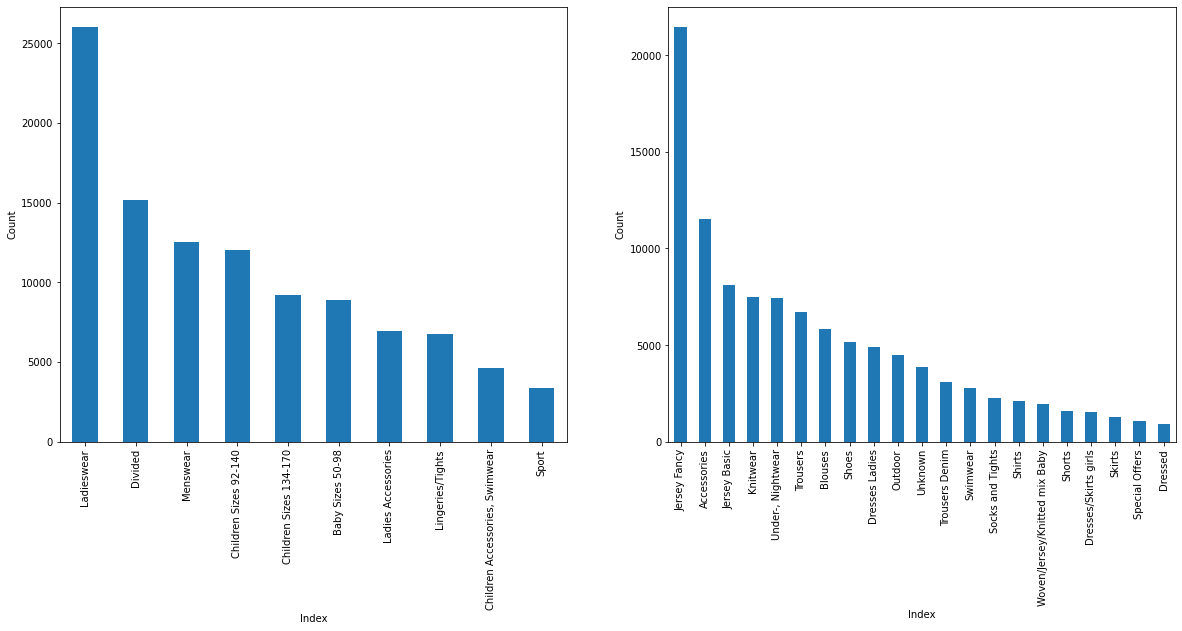

In [ ]:
# Bar chart
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plot = articleProcessed['index_name'].value_counts().plot(kind='bar')
plot.set_xlabel('Index')
plot.set_ylabel('Count')
plt.subplot(1, 2, 2)
plot = articleProcessed['garment_group_name'].value_counts().plot(kind='bar')
plot.set_xlabel('Index')
plot.set_ylabel('Count')

Starting by seperating with index, which we can see the general distribution of products in H&M. Ladieswear has the most product, where sports got the lease. This is a good start, where we know the general distribution of the data! Let's move on to customers!

(array([1.26779e+05, 2.30390e+05, 2.02075e+05, 1.44640e+05, 8.39290e+04,
        6.23540e+04, 8.90390e+04, 9.89210e+04, 1.11787e+05, 8.46820e+04,
        5.32550e+04, 3.07010e+04, 1.84400e+04, 1.31430e+04, 3.95900e+03,
        1.42900e+03, 3.82000e+02, 1.37000e+02, 4.00000e+01, 3.70000e+01]),
 array([16.  , 20.15, 24.3 , 28.45, 32.6 , 36.75, 40.9 , 45.05, 49.2 ,
        53.35, 57.5 , 61.65, 65.8 , 69.95, 74.1 , 78.25, 82.4 , 86.55,
        90.7 , 94.85, 99.  ]),
 <BarContainer object of 20 artists>)

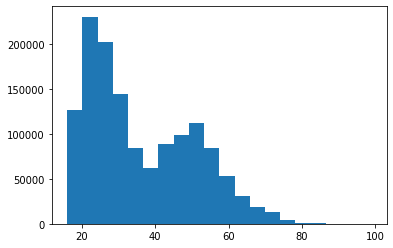

In [ ]:
# Distribution of Customers based on age
plt.hist(customersProcessed['age'], bins = 20, label='hist')

We can see that most of the customers are around 20~30 years old. Histogram can be deceiving with bin count, and I realized that the best way to show it is through KDE

<AxesSubplot:title={'center':'Customer Age KDE'}, ylabel='Density'>

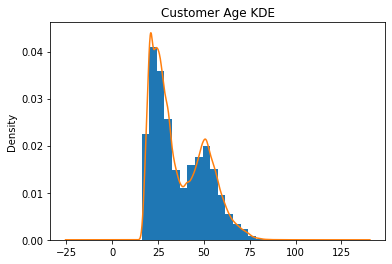

In [ ]:
customersProcessed['age'].hist(bins = 20, density = True)
customersProcessed['age'].plot(kind = 'kde', title = 'Customer Age KDE')

KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.

After some quick analysis on articles and customers, let's connect it with the training data! For the training dataset, it only has the user ID, and the products ID they purchased. Let's do a seperation on index for the data!

In [ ]:
# make a dataframe where the articleid in trainingdata connects with the index_no & index_name! & customer age!
# customerage = []
# for i in transactionDF['customer_id']:
#   tmp = customersProcessed[customersProcessed['customer_id'] == i]
#   customerage.extend(tmp['age'].values)
# The code above timed out due to too many entries. 

Lets start by running sample data!

In [ ]:
transactionsample = transactionDF.sample(n = 10000)

In [ ]:
transactionsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15102829 to 22609879
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   t_dat             10000 non-null  object 
 1   customer_id       10000 non-null  object 
 2   article_id        10000 non-null  int64  
 3   price             10000 non-null  float64
 4   sales_channel_id  10000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 468.8+ KB


In [ ]:
# customerage = []
# for i in transactionsample['customer_id']:
#   tmp = customersProcessed[customersProcessed['customer_id'] == i]
#   customerage.extend(tmp['age'].values)


## 3. Algorithm and Methodology

In [ ]:
import numpy as np
import pandas as pd 
pd.options.plotting.backend = "matplotlib"
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import gc
import cudf
# from fastai.tabular.core import add_datepart
import cupy as cp
from cuml.cluster import KMeans
from cuml.datasets import make_blobs


In [ ]:
transactions = cudf.read_csv('/content/transactions_train.csv', parse_dates=['t_dat'])
transactions['customer_id'] = transactions['customer_id'].str[-16:].str.hex_to_int().astype('int64')
transactions['article_id'] = transactions.article_id.astype('int32')
transactions.t_dat = cudf.to_datetime(transactions.t_dat)
transactions = transactions[['t_dat','customer_id','article_id']]


In [ ]:
print( transactions.shape )
transactions.head()

(31788324, 3)


,t_dat,customer_id,article_id
0,2018-09-20,-6846340800584936,663713001
1,2018-09-20,-6846340800584936,541518023
2,2018-09-20,-8334631767138808638,505221004
3,2018-09-20,-8334631767138808638,685687003
4,2018-09-20,-8334631767138808638,685687004


In [ ]:
tmp = transactions.groupby(['customer_id','article_id'])['t_dat'].agg('count').reset_index()
tmp.columns = ['customer_id','article_id','ct']
tmp.tail()

,customer_id,article_id,ct
27306434,5200127054640872132,770780002,2
27306435,1269242157914824922,714620007,1
27306436,-1030064341246432068,695071003,1
27306437,-4678348901512812118,769434002,1
27306438,-2999360307690285350,628499009,1


In [ ]:
transactions = transactions.merge(tmp,on=['customer_id','article_id'],how='left')
transactions = transactions.sort_values(['ct','t_dat'],ascending=False)
transactions = transactions.drop_duplicates(['customer_id','article_id'])
transactions = transactions.sort_values(['ct','t_dat'],ascending=False)

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,ct
1169104,2018-10-14,5743206735920807081,678342001,570
6253568,2019-02-16,-6801691935245814174,629420001,199
8783472,2019-04-15,-354604980049654278,507909001,188
5826576,2019-02-04,-7250849952617471376,570002001,170
17137152,2019-09-28,-4193172709156082837,688558002,166


In [ ]:
transactions['year'] = transactions['t_dat'].dt.year
transactions['month'] = transactions['t_dat'].dt.month
transactions['day'] = transactions['t_dat'].dt.day
transactions['dayofweek'] = transactions['t_dat'].dt.dayofweek
transactions['dayofyear'] = transactions['t_dat'].dt.dayofyear
transactions['is_month_end'] = transactions['t_dat'].dt.is_month_end
transactions['is_month_start'] = transactions['t_dat'].dt.is_month_start
transactions.drop(columns=['t_dat'], inplace = True)



In [ ]:
transactions.tail()

,customer_id,article_id,ct,year,month,day,dayofweek,dayofyear,is_month_end,is_month_start
684,9220147840092367636,660712012,1,2018,9,20,3,263,False,False
683,9220147840092367636,684588001,1,2018,9,20,3,263,False,False
48506,9220362922743867869,537346022,1,2018,9,20,3,263,False,False
48507,9220362922743867869,640252004,1,2018,9,20,3,263,False,False
48505,9220362922743867869,660599001,1,2018,9,20,3,263,False,False


In [ ]:
transactions['cust_cat']= transactions['customer_id'].astype('category')
transactions['cat_codes'] = transactions['cust_cat'].cat.codes 
cust_cat_df = transactions[['customer_id', 'cust_cat', 'cat_codes']] #save them to put them back together later

In [ ]:
print(cust_cat_df.dtypes)

customer_id       int64
cust_cat       category
cat_codes        uint32
dtype: object


In [ ]:
cust_cat_df.head()

,customer_id,cust_cat,cat_codes
1169104,5743206735920807081,5743206735920807081,1106135
6253568,-6801691935245814174,-6801691935245814174,179584
8783472,-354604980049654278,-354604980049654278,655857
5826576,-7250849952617471376,-7250849952617471376,146415
17137152,-4193172709156082837,-4193172709156082837,372540


In [ ]:
transactions.drop(columns=['cust_cat', 'cat_codes'], inplace = True)
transactions.dtypes

customer_id       int64
article_id        int32
ct                int32
year              int16
month             int16
day               int16
dayofweek         int16
dayofyear         int16
is_month_end       bool
is_month_start     bool
dtype: object

In [ ]:
#Put the number sold into articles 
articles = cudf.read_csv('/content/articles.csv')
articles.drop(columns=['detail_desc'], inplace = True)
articles.shape, articles.dtypes
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,7188,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,1919,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,1641,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,3946,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories


In [ ]:
cat_names= articles.select_dtypes(include=['object']).columns
cont_names = articles.select_dtypes(include=['int64']).columns
obj_names = articles.select_dtypes(include=['object']).columns

for i in cat_names: articles[i+'_cat']=articles[i].astype('category')
for i in obj_names: articles.drop(columns=[i], inplace = True)



In [ ]:
articles.dtypes

article_id                             int64
product_code                           int64
product_type_no                        int64
graphical_appearance_no                int64
colour_group_code                      int64
perceived_colour_value_id              int64
perceived_colour_master_id             int64
department_no                          int64
index_group_no                         int64
section_no                             int64
garment_group_no                       int64
prod_name_cat                       category
product_type_name_cat               category
product_group_name_cat              category
graphical_appearance_name_cat       category
colour_group_name_cat               category
perceived_colour_value_name_cat     category
perceived_colour_master_name_cat    category
department_name_cat                 category
index_code_cat                      category
index_name_cat                      category
index_group_name_cat                category
section_na

In [ ]:
times_bought = transactions[['article_id', 'ct']]
times_bought = times_bought.groupby('article_id', as_index = False).sum()

In [ ]:
articles = articles.merge(times_bought,  how='left', on='article_id')
articles['ct'] = articles['ct'].fillna(0)

In [ ]:
cat_names= articles.select_dtypes(include=['category']).columns
article_cat_df = cudf.DataFrame()

for i in cat_names: 
    articles[i+'_cat_code'] = articles[i].cat.codes
    
    #save them to put them back together later
    article_cat_df[i] = articles[i]    
    article_cat_df[i+'cat_code'] =articles[i+'_cat_code']
    


In [ ]:
article_cat_df

,prod_name_cat,prod_name_catcat_code,product_type_name_cat,product_type_name_catcat_code,product_group_name_cat,product_group_name_catcat_code,graphical_appearance_name_cat,graphical_appearance_name_catcat_code,colour_group_name_cat,colour_group_name_catcat_code,...,index_code_cat,index_code_catcat_code,index_name_cat,index_name_catcat_code,index_group_name_cat,index_group_name_catcat_code,section_name_cat,section_name_catcat_code,garment_group_name_cat,garment_group_name_catcat_code
0,MAMA EVA tank top,25733,Vest top,121,Garment Upper body,7,Solid,25,Dark Blue,5,...,A,0,Ladieswear,6,Ladieswear,2,Mama,29,Jersey Fancy,6
1,Arne boot,2774,Boots,14,Shoes,12,Solid,25,Black,1,...,F,4,Menswear,8,Menswear,3,Men Shoes,36,Shoes,10
2,Basic cropped leggings,4534,Leggings/Tights,61,Garment Lower body,6,Solid,25,Black,1,...,A,0,Ladieswear,6,Ladieswear,2,H&M+,18,Jersey Fancy,6
3,Tompa boot,42882,Boots,14,Shoes,12,Solid,25,Black,1,...,F,4,Menswear,8,Menswear,3,Men Shoes,36,Shoes,10
4,EQ Bonnie dress,13442,Dress,32,Garment Full body,5,Solid,25,Grey,17,...,D,3,Divided,4,Divided,1,Divided Projects,14,Unknown,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,Flirty Lynn hoop,16156,Earring,34,Accessories,0,Solid,25,White,47,...,C,2,Ladies Accessories,5,Ladieswear,2,Womens Small accessories,50,Accessories,0
105538,NISCH SUEDE OVERSHIRT,29105,Shirt,86,Garment Upper body,7,Solid,25,Black,1,...,F,4,Menswear,8,Menswear,3,Contemporary Smart,6,Shirts,9
105539,DJUR soft toy,11228,Other accessories,69,Accessories,0,Solid,25,Light Beige,19,...,G,5,Baby Sizes 50-98,0,Baby/Children,0,Baby Essentials & Complements,1,Woven/Jersey/Knitted mix Baby,20
105540,REVERB UTILITY SHIRT,34266,Shirt,86,Garment Upper body,7,Denim,7,Greyish Beige,18,...,F,4,Menswear,8,Menswear,3,Contemporary Smart,6,Shirts,9


In [ ]:
for i in cat_names:
    articles.drop(columns=[i], inplace = True)
articles.dtypes

article_id                                    int64
product_code                                  int64
product_type_no                               int64
graphical_appearance_no                       int64
colour_group_code                             int64
perceived_colour_value_id                     int64
perceived_colour_master_id                    int64
department_no                                 int64
index_group_no                                int64
section_no                                    int64
garment_group_no                              int64
ct                                            int64
prod_name_cat_cat_code                       uint16
product_type_name_cat_cat_code                uint8
product_group_name_cat_cat_code               uint8
graphical_appearance_name_cat_cat_code        uint8
colour_group_name_cat_cat_code                uint8
perceived_colour_value_name_cat_cat_code      uint8
perceived_colour_master_name_cat_cat_code     uint8
department_n

In [ ]:
int64s = articles.select_dtypes(include=['int64']).columns
for i in int64s:
    articles[i] = articles[i].astype(float)

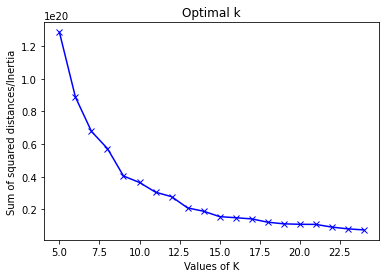

In [ ]:
Sum_of_squared_distances = []
K = range(5, 25)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(articles)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Optimal k')
plt.show()

In [ ]:
kmeans_float = KMeans(n_clusters=12)
kmeans_fit = kmeans_float.fit(articles)

In [ ]:
labels = kmeans_float.labels_
articles['clusters'] = labels

In [ ]:
articles.clusters.value_counts()

10    15718
1     14769
4     14049
5     13930
2     12147
8     11759
9      9191
0      6395
11     4531
6      1476
7      1024
3       553
Name: clusters, dtype: int32

In [ ]:
articles.to_parquet('articles.parquet', index=False)

articles['ct']

0          10.0
1          28.0
2         283.0
3           5.0
4           1.0
          ...  
105537     82.0
105538      5.0
105539      1.0
105540      0.0
105541    197.0
Name: ct, Length: 105542, dtype: float64

### Use Random forest to predict sales

In [ ]:
cols_list = articles.columns
cols_list = cols_list.to_list()
print(cols_list)
cols_list.remove('ct')

['article_id', 'product_code', 'product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_group_no', 'section_no', 'garment_group_no', 'ct', 'prod_name_cat_cat_code', 'product_type_name_cat_cat_code', 'product_group_name_cat_cat_code', 'graphical_appearance_name_cat_cat_code', 'colour_group_name_cat_cat_code', 'perceived_colour_value_name_cat_cat_code', 'perceived_colour_master_name_cat_cat_code', 'department_name_cat_cat_code', 'index_code_cat_cat_code', 'index_name_cat_cat_code', 'index_group_name_cat_cat_code', 'section_name_cat_cat_code', 'garment_group_name_cat_cat_code', 'clusters']


In [ ]:
X = articles[cols_list].to_pandas()

y = articles['ct'].to_pandas()
X.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,...,colour_group_name_cat_cat_code,perceived_colour_value_name_cat_cat_code,perceived_colour_master_name_cat_cat_code,department_name_cat_cat_code,index_code_cat_cat_code,index_name_cat_cat_code,index_group_name_cat_cat_code,section_name_cat_cat_code,garment_group_name_cat_cat_code,clusters
0,584765002.0,584765.0,253.0,1010016.0,73.0,4.0,2.0,2032.0,1.0,8.0,...,5,1,2,81,0,6,2,29,6,9
1,584771001.0,584771.0,87.0,1010016.0,9.0,4.0,5.0,3630.0,3.0,27.0,...,1,1,1,169,4,8,3,36,10,9
2,584778002.0,584778.0,273.0,1010016.0,9.0,4.0,5.0,1919.0,1.0,2.0,...,1,1,1,81,0,6,2,18,6,9
3,584788001.0,584788.0,87.0,1010016.0,9.0,4.0,5.0,3630.0,3.0,27.0,...,1,1,1,169,4,8,3,36,10,9
4,584789001.0,584789.0,265.0,1010016.0,7.0,1.0,12.0,1352.0,2.0,50.0,...,17,2,6,63,3,4,1,14,19,9


In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [ ]:
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model_1 = RandomForestRegressor(n_estimators = 20)

#fit the model
model_1.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=20)

In [ ]:
predictions = model_1.predict(X_test)
error = Y_test - predictions

In [ ]:
error

array([ -7.61429737,  -2.91555815, -15.17329781, -86.53068956,
       -19.20377459,  -2.10962389, -11.58590218,   5.14496876,
        -3.51835706,  -1.14588874, -36.61379711,   1.9213555 ,
        -5.21233061,  -7.52229659,  -3.08692181, -11.64465729,
       -10.95889754, -35.00248626, -27.28089958,  62.77904706,
       -24.24143866,  11.66857063, -26.39886901,  33.31165073,
        13.11731953, -11.5945322 ,  30.29986334, -18.00430927,
        10.32095195, -14.10679328,   9.42378188,   5.3572467 ,
       -14.63381021,   9.76917813, -28.13966323,   2.01235836,
        19.48108114,  -2.26229801,  -9.34917603,  17.89508586,
         7.87402927,   0.95610407, -53.89013856,  -5.41783053,
        -4.8821905 , -25.84495185,   8.73665225,  11.80804483,
       -28.18301658, -39.53969841,  -0.71222149,  18.64075139,
        -4.859352  , -14.54012534,   7.08734947, -33.38687946,
       -55.6550974 ,  14.78313854,   5.04433277, -29.97977663,
         6.11057316,  73.33373096,  -6.20783998, -27.93

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test ,predictions))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(Y_test ,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test ,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test ,predictions)))
print('R-Square:', metrics.r2_score(Y_test, predictions))

Mean Absolute Error: 19.126167375624366
Mean Absolute Percentage Error: 1.7855210085592372
Mean Squared Error: 670.4444251864144
Root Mean Squared Error: 25.892941609373285
R-Square: 0.9588698494890316


### Use Random Decision Tree to predict sales

In [ ]:
# define the model
model_2 = DecisionTreeRegressor()

# fit the model
model_2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (200, 200))
plot_tree(model_2, filled=True, fontsize = 15)
plt.show()
# add maxdepth for better view

In [ ]:
plt.figure(figsize = (300, 75))
plot_tree(model_2, filled=True, fontsize = 40, max_depth = 5)
plt.show()
# add maxdepth for better view

## 4. Experiments and Results

### We will find items that frequently purchased together

In [ ]:
import cudf, gc
import cv2, matplotlib.pyplot as plt
from os.path import exists
print('RAPIDS version',cudf.__version__)

RAPIDS version 21.12.02


In [ ]:
df = cudf.read_csv('/content/transactions_train.csv')
print('Transactions shape',df.shape)
display( df.head() )

# REDUCE MEMORY OF DATAFRAME
df = df[['customer_id','article_id']]
df.customer_id = df.customer_id.str[-16:].str.hex_to_int().astype('int64')
df.article_id = df.article_id.astype('int32')
_ = gc.collect()

Transactions shape (31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
vc = df.article_id.value_counts()
pairs = {}
for j,i in enumerate(vc.index.values[1000:1032]):
    #if j%10==0: print(j,', ',end='')
    USERS = df.loc[df.article_id==i.item(),'customer_id'].unique()
    vc2 = df.loc[(df.customer_id.isin(USERS))&(df.article_id!=i.item()),'article_id'].value_counts()
    pairs[i.item()] = [vc2.index[0], vc2.index[1], vc2.index[2]]

In [ ]:
items = cudf.read_csv('/content/articles.csv')
BASE = '/content/images/'

for i,(k,v) in enumerate( pairs.items() ):
    name1 = BASE+'0'+str(k)[:2]+'/0'+str(k)+'.jpg'
    name2 = BASE+'0'+str(v[0])[:2]+'/0'+str(v[0])+'.jpg'
    name3 = BASE+'0'+str(v[1])[:2]+'/0'+str(v[1])+'.jpg'
    name4 = BASE+'0'+str(v[2])[:2]+'/0'+str(v[2])+'.jpg'
    if exists(name1) & exists(name2) & exists(name3) & exists(name4):
        plt.figure(figsize=(20,5))
        img1 = cv2.imread(name1)[:,:,::-1]
        img2 = cv2.imread(name2)[:,:,::-1]
        img3 = cv2.imread(name3)[:,:,::-1]
        img4 = cv2.imread(name4)[:,:,::-1]
        plt.subplot(1,4,1)
        plt.title('When customers buy this',size=18)
        plt.imshow(img1)
        plt.subplot(1,4,2)
        plt.title('They buy this',size=18)
        plt.imshow(img2)
        plt.subplot(1,4,3)
        plt.title('They buy this',size=18)
        plt.imshow(img3)
        plt.subplot(1,4,4)
        plt.title('They buy this',size=18)
        plt.imshow(img4)
        plt.show()

We run the data through our model, see what it brings up!



## 5. Summary and Conclusions

H&M Group is a family of brands and businesses with 53 online markets and approximately 4,850 stores. Our online store offers shoppers an extensive selection of products to browse through. 

We aim to develop product recommendations based on data from previous transactions, as well as from customer and product meta data. The available meta data spans from simple data, such as garment type and customer age, to text data from product descriptions, to image data from garment images.

So we will explore very important relation which will give us very strong inducation of which items were frequently purchased together. Using this information, we can predict which items a customer will buy so we could use this information to increase the probability of make the customer buy it.